# <span style="color:purple"> Final Project The Economist Semantic Analysis (2)

In [1]:
import lucem_illud 

import pandas #gives us DataFrames
import numpy as np #For divergences/distances
import scipy #For divergences/ distances/ hierarchical clustering and some visuals

import nltk #the Natural Language Toolkit
from nltk.corpus import stopwords #For stopwords

import seaborn as sns #makes our plots look nicer
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import wordcloud #Makes word clouds

#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import sklearn.manifold #For a manifold plot

import gensim#For topic modeling

from bs4 import BeautifulSoup
import requests #for http requests
from requests import get
import urllib.parse #For joining urls
import re #for regexs
import json #For API responses

import itertools

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:purple"> For Week 4 Word Embedding

In [3]:
ECONOMIST_Token = pandas.read_csv('ECONOMIST_Token_Neat.csv')

In [4]:
ECONOMIST_Token = ECONOMIST_Token.drop(columns = ['Unnamed: 0'])

In [5]:
ECONOMIST_Token[:3]

,Year,Month,Day,Title,Tag,Article,Token_Word,Remark_Index
0,2006,1,14,Nuclear proliferation Misreading Iran,Leaders,\n\t\t\tSpecial report Iran's nuclear programm...,"['Special', 'report', 'Iran', ""'s"", 'nuclear',...",31
1,2006,1,14,UN reform Fix it or scrap it,Leaders,\n\t\t\tMexico and the United States Shots acr...,"['Mexico', 'and', 'the', 'United', 'States', '...",58
2,2006,1,14,Spain and its regions A Catalan kerfuffle,Leaders,\n\t\t\tSpain and Catalonia Bad echoes from th...,"['Spain', 'and', 'Catalonia', 'Bad', 'echoes',...",45


In [6]:
Topics = ['Leaders', 'Britain', 'Europe', 'United States', 'The Americas', 
              'Middle East and Africa', 'Asia', 'Obituary',
              'Business', 'Finance and economics', 'Science and technology', 'Books and arts']

years = ['2006','2007','2008','2009','2010']

In [7]:
Fin_Econ_DF = lucem_illud.loadTextDirectory('/Users/Techbar/Downloads/Fin_Econ')

NameError: name 'lucem_illud' is not defined

In [9]:
Fin_Econ_DF

,text
Finance and economics_2006.txt,\n\t\t\tAppointments m The Africa Rice Center ...
Finance and economics_2007.txt,\n\t\t\tBooks and arts\n\t\t\tBeatrix Potter F...
Finance and economics_2008.txt,\n\t\t\tYou don't have to be rich Developing c...
Finance and economics_2009.txt,\n\t\t\tFinance and economics\n\t\t\tBanking i...
Finance and economics_2010.txt,\n\t\t\tFinance and economics\n\t\t\tTo lose o...


In [10]:
# Tokenize and normalize the texts
Fin_Econ_DF['tokenized_sents'] = Fin_Econ_DF['text'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
Fin_Econ_DF['normalized_sents'] = Fin_Econ_DF['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

Fin_Econ_DF[:5]

,text,tokenized_sents,normalized_sents
Finance and economics_2006.txt,\n\t\t\tAppointments m The Africa Rice Center ...,"[[Appointments, m, The, Africa, Rice, Center, ...","[[appointments, africa, rice, center, warda, s..."
Finance and economics_2007.txt,\n\t\t\tBooks and arts\n\t\t\tBeatrix Potter F...,"[[Books, and, arts, Beatrix, Potter, Force, of...","[[books, arts, beatrix, potter, force, nature,..."
Finance and economics_2008.txt,\n\t\t\tYou don't have to be rich Developing c...,"[[You, do, n't, have, to, be, rich, Developing...","[[rich, developing, countries, attract, migran..."
Finance and economics_2009.txt,\n\t\t\tFinance and economics\n\t\t\tBanking i...,"[[Finance, and, economics, Banking, in, China,...","[[finance, economics, banking, china, needed, ..."
Finance and economics_2010.txt,\n\t\t\tFinance and economics\n\t\t\tTo lose o...,"[[Finance, and, economics, To, lose, one, deca...","[[finance, economics, lose, one, decade, may, ..."


In [12]:
# word to vector
Fin_EconW2V = gensim.models.word2vec.Word2Vec(Fin_Econ_DF['normalized_sents'].sum())


In [13]:
# words and their frequencies -- generate the list of representative words
Fin_Econ_DF['tokenized_text'] = Fin_Econ_DF['text'].apply(lambda x: nltk.word_tokenize(x))
countsDict = {}
for word in Fin_Econ_DF['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)

In [158]:
#word_counts[60:150]
#keywords = ['America']
#for i in range(60, 5060):
#    keywords.append(word_counts[i][0])

In [1]:
keywords = ['crunch','bubbles','wreckage', 'collapse','negative','bubble',
           'worst','crises','meltdowns','turmoil','loss','loan', 'panic', 'global']

In [2]:
# application:
# CookBookW2V.most_similar('water')

In [ ]:
Fin_EconW2V.most_similar(positive=['housing', 'crisis'], negative = ['america'])

<span style="color:purple"> causality: ('caused', 0.637915849685669)

In [ ]:
Fin_EconW2V.most_similar(positive=['crisis', 'europe'], negative = ['asia'])

In [ ]:
Fin_EconW2V.most_similar(positive=['crisis', 'america'], negative = ['asia'])

In [ ]:
Fin_EconW2V.most_similar(positive=['crisis', 'america'], negative = ['europe'])

In [123]:
Fin_EconW2V.most_similar(positive=['crisis', 'america'], negative = ['britain'])

[('crunch', 0.665003776550293),
 ('wreckage', 0.6434580087661743),
 ('crises', 0.5987685322761536),
 ('collapse', 0.5804882645606995),
 ('boom', 0.570268988609314),
 ('kets', 0.5668572187423706),
 ('turmoil', 0.5433524250984192),
 ('hit', 0.5384184122085571),
 ('meltdowns', 0.5344049334526062),
 ('ticked', 0.5333815813064575)]

In [124]:
Fin_EconW2V.most_similar(positive=['crisis', 'america'], negative = ['africa'])

[('crunch', 0.689895749092102),
 ('losses', 0.6573129892349243),
 ('wreckage', 0.6178520917892456),
 ('ratings', 0.6037278175354004),
 ('bigger', 0.6012319326400757),
 ('hit', 0.6012295484542847),
 ('loss', 0.5922435522079468),
 ('collapse', 0.5822243094444275),
 ('boom', 0.5815901756286621),
 ('lenders', 0.5801968574523926)]

<span style="color:purple"> the above shows that the crisis is in a global range. No country or area is luck enough to avoid the "crunch", "collapse", "turmoil", "meltdown"!

In [125]:
Fin_Econ_DF

,text,tokenized_sents,normalized_sents,tokenized_text,text_name,normalized_tokens,normalized_tokens_count,Tagged_Text
Finance and economics_2006.txt,\n\t\t\tAppointments m The Africa Rice Center ...,"[[Appointments, m, The, Africa, Rice, Center, ...","[[appointments, africa, rice, center, warda, s...","[Appointments, m, The, Africa, Rice, Center, W...",Finance and economics_2006.txt,"[appointments, africa, rice, center, warda, se...",180211,"([appointments, africa, rice, center, warda, s..."
Finance and economics_2007.txt,\n\t\t\tBooks and arts\n\t\t\tBeatrix Potter F...,"[[Books, and, arts, Beatrix, Potter, Force, of...","[[books, arts, beatrix, potter, force, nature,...","[Books, and, arts, Beatrix, Potter, Force, of,...",Finance and economics_2007.txt,"[books, arts, beatrix, potter, force, nature, ...",180135,"([books, arts, beatrix, potter, force, nature,..."
Finance and economics_2008.txt,\n\t\t\tYou don't have to be rich Developing c...,"[[You, do, n't, have, to, be, rich, Developing...","[[rich, developing, countries, attract, migran...","[You, do, n't, have, to, be, rich, Developing,...",Finance and economics_2008.txt,"[rich, developing, countries, attract, migrant...",195232,"([rich, developing, countries, attract, migran..."
Finance and economics_2009.txt,\n\t\t\tFinance and economics\n\t\t\tBanking i...,"[[Finance, and, economics, Banking, in, China,...","[[finance, economics, banking, china, needed, ...","[Finance, and, economics, Banking, in, China, ...",Finance and economics_2009.txt,"[finance, economics, banking, china, needed, s...",252885,"([finance, economics, banking, china, needed, ..."
Finance and economics_2010.txt,\n\t\t\tFinance and economics\n\t\t\tTo lose o...,"[[Finance, and, economics, To, lose, one, deca...","[[finance, economics, lose, one, decade, may, ...","[Finance, and, economics, To, lose, one, decad...",Finance and economics_2010.txt,"[finance, economics, lose, one, decade, may, m...",264006,"([finance, economics, lose, one, decade, may, ..."


In [126]:
# I will only target the top 200 words in the list
numWords = 200
targetWords = Fin_EconW2V.wv.index2word[:numWords]


stop_words_nltk = stopwords.words('english')

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

Fin_Econ_DF['normalized_tokens'] = Fin_Econ_DF['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = None))

Fin_Econ_DF['normalized_tokens_count'] = Fin_Econ_DF['normalized_tokens'].apply(lambda x: len(x))

Fin_Econ_DF.sort_values(by='normalized_tokens_count', ascending=False)[:3]

,text,tokenized_sents,normalized_sents,tokenized_text,text_name,normalized_tokens,normalized_tokens_count,Tagged_Text
Finance and economics_2010.txt,\n\t\t\tFinance and economics\n\t\t\tTo lose o...,"[[Finance, and, economics, To, lose, one, deca...","[[finance, economics, lose, one, decade, may, ...","[Finance, and, economics, To, lose, one, decad...",Finance and economics_2010.txt,"[finance, economics, lose, one, decade, may, m...",264006,"([finance, economics, lose, one, decade, may, ..."
Finance and economics_2009.txt,\n\t\t\tFinance and economics\n\t\t\tBanking i...,"[[Finance, and, economics, Banking, in, China,...","[[finance, economics, banking, china, needed, ...","[Finance, and, economics, Banking, in, China, ...",Finance and economics_2009.txt,"[finance, economics, banking, china, needed, s...",252885,"([finance, economics, banking, china, needed, ..."
Finance and economics_2008.txt,\n\t\t\tYou don't have to be rich Developing c...,"[[You, do, n't, have, to, be, rich, Developing...","[[rich, developing, countries, attract, migran...","[You, do, n't, have, to, be, rich, Developing,...",Finance and economics_2008.txt,"[rich, developing, countries, attract, migrant...",195232,"([rich, developing, countries, attract, migran..."


In [161]:
Fin_Econ_DF['text_name'] = Fin_Econ_DF.index
    
taggedDocs = []
for index, row in Fin_Econ_DF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_tokens']]
    docKeywords.append(row['text_name']) #This lets us extract individual documnets since text_names's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_tokens'], tags = docKeywords))
Fin_Econ_DF['Tagged_Text'] = taggedDocs


In [162]:
# Train a Doc2Vec model
Fin_EconD2V = gensim.models.doc2vec.Doc2Vec(Fin_Econ_DF['Tagged_Text'], size = 500) #Limiting to 100 dimensions

## <span style="color:purple"> Cosine Similarity: Text vs Word!!!!

In [163]:
# find out the text file most similar to 'salads'
Fin_EconD2V.docvecs.most_similar([ Fin_EconD2V['crisis'] ], topn=5 )


[('Finance and economics_2010.txt', 0.8854334950447083),
 ('btg', 0.8852806091308594),
 ('emf', 0.8852449655532837),
 ('aia', 0.8852046728134155),
 ('ey', 0.8835609555244446)]

In [165]:
Fin_EconD2V.docvecs.most_similar([ Fin_EconD2V['collapse'] ], topn=5 )

[('emf', 0.9433571100234985),
 ('btg', 0.9433351755142212),
 ('aia', 0.9432446956634521),
 ('Finance and economics_2010.txt', 0.9431103467941284),
 ('Finance and economics_2008.txt', 0.9426082372665405)]

In [168]:
Fin_EconD2V.docvecs.most_similar([ Fin_EconD2V['government'] ], topn=10 )

[('aia', 0.9986162781715393),
 ('emf', 0.9986085295677185),
 ('btg', 0.9985909461975098),
 ('Finance and economics_2010.txt', 0.9985827207565308),
 ('Finance and economics_2008.txt', 0.9983230829238892),
 ('etfs', 0.9963059425354004),
 ('peripheral', 0.9952263832092285),
 ('ey', 0.993478536605835),
 ('er', 0.9913570880889893),
 ('otc', 0.9723823070526123)]

In [170]:
Fin_EconD2V.docvecs.most_similar([ Fin_EconD2V['imf'] ], topn=8 )

[('emf', 0.9873069524765015),
 ('Finance and economics_2010.txt', 0.9872950315475464),
 ('btg', 0.9872950315475464),
 ('aia', 0.9872583150863647),
 ('Finance and economics_2008.txt', 0.9869569540023804),
 ('etfs', 0.9856189489364624),
 ('peripheral', 0.9850360155105591),
 ('ey', 0.9824831485748291)]

In [172]:
Fin_EconD2V.docvecs.most_similar([ Fin_EconD2V['fed'] ], topn=7 )

[('Finance and economics_2010.txt', 0.995956301689148),
 ('emf', 0.9959264397621155),
 ('aia', 0.9959224462509155),
 ('btg', 0.9959203600883484),
 ('Finance and economics_2008.txt', 0.995502769947052),
 ('etfs', 0.9929993748664856),
 ('peripheral', 0.9918250441551208)]

In [173]:
# find out the text file most similar to a list of words
Fin_EconD2V.docvecs.most_similar([ Fin_EconD2V['crunch']+Fin_EconD2V['losses']+Fin_EconD2V['bust']+
                                  Fin_EconD2V['collapse']+Fin_EconD2V['wreckage']+
                                  Fin_EconD2V['meltdowns']+Fin_EconD2V['turmoil']+
                                  Fin_EconD2V['crisis']+Fin_EconD2V['panic']], topn=5 )


[('btg', 0.9888094663619995),
 ('aia', 0.9887913465499878),
 ('Finance and economics_2010.txt', 0.988761842250824),
 ('emf', 0.9887580275535583),
 ('Finance and economics_2008.txt', 0.9882049560546875)]

In [180]:
# find out the text file most similar to a list of words
Fin_EconD2V.docvecs.most_similar([ Fin_EconD2V['action']+Fin_EconD2V['policy']+Fin_EconD2V['strategy']+
                                  Fin_EconD2V['system']+Fin_EconD2V['positive']+
                                  Fin_EconD2V['national']+Fin_EconD2V['turmoil']+
                                  Fin_EconD2V['panic']], topn=10 )


[('ground', 0.9968371987342834),
 ('Finance and economics_2009.txt', 0.9968199729919434),
 ('seen', 0.9968172311782837),
 ('tended', 0.9968137741088867),
 ('coverage', 0.9968044757843018),
 ('study', 0.996803879737854),
 ('movements', 0.996802031993866),
 ('choose', 0.9967999458312988),
 ('lot', 0.996799111366272),
 ('uncertain', 0.9967941641807556)]

In [ ]:
# Find out the words most similar to the cook books

In [183]:
Fin_EconD2V.most_similar( [ Fin_EconD2V.docvecs['Finance and economics_2007.txt'] ], topn=10) 


[('equity', 0.9999443888664246),
 ('private', 0.9999136924743652),
 ('executives', 0.9998984932899475),
 ('boards', 0.9998396039009094),
 ('gdp', 0.9997953772544861),
 ('managers', 0.9997891783714294),
 ('board', 0.9997871518135071),
 ('pay', 0.9997818470001221),
 ('also', 0.9997752904891968),
 ('directors', 0.9997593760490417)]

In [182]:
Fin_EconD2V.most_similar( [ Fin_EconD2V.docvecs['Finance and economics_2008.txt'] ], topn=10) 


[('banks', 0.9991155862808228),
 ('people', 0.9990350008010864),
 ('federal', 0.9986315965652466),
 ('credit', 0.998619794845581),
 ('africa', 0.9985910654067993),
 ('salt', 0.9985305070877075),
 ('food', 0.9984995126724243),
 ('tax', 0.998495876789093),
 ('page', 0.9983843564987183),
 ('skills', 0.9983471632003784)]

In [181]:
Fin_EconD2V.most_similar( [ Fin_EconD2V.docvecs['Finance and economics_2009.txt'] ], topn=10) 


[('equity', 0.9998527765274048),
 ('private', 0.9998342990875244),
 ('executives', 0.9998340010643005),
 ('board', 0.9997969269752502),
 ('much', 0.999784529209137),
 ('mr', 0.9997682571411133),
 ('also', 0.9997620582580566),
 ('boards', 0.9997554421424866),
 ('managers', 0.9997518062591553),
 ('directors', 0.9997168779373169)]

In [184]:
Fin_EconD2V.most_similar( [ Fin_EconD2V.docvecs['Finance and economics_2010.txt'] ], topn=10) 


[('banks', 0.9993146657943726),
 ('people', 0.9992952346801758),
 ('credit', 0.9989756345748901),
 ('federal', 0.9989078044891357),
 ('africa', 0.9988895654678345),
 ('salt', 0.9988563060760498),
 ('food', 0.9988546967506409),
 ('tax', 0.9987888336181641),
 ('skills', 0.9987151622772217),
 ('page', 0.9986944198608398)]

In [185]:
targetDocs = Fin_Econ_DF['text_name'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = Fin_EconD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, Fin_EconD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

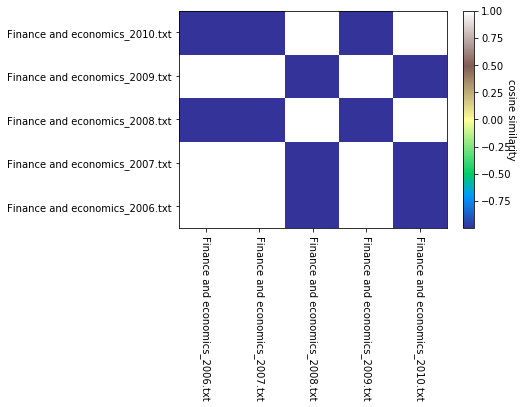

In [186]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

## <span style="color:purple"> Articles by sectors + evolution

In [ ]:
Topics = ['Leaders', 'Britain', 'Europe', 'United States', 'The Americas', 
              'Middle East and Africa', 'Asia', 'Obituary',
              'Business', 'Finance and economics', 'Science and technology', 'Books and arts']